In [38]:
# load data with bounds
#########

from astropy.table import Table
from astropy.coordinates import SkyCoord

previous_filename = "gd1_redux_03.hdf5"
results_t = Table.read(previous_filename, path="results")

previous_filename = "gd1_redux_02.hdf5"
cm_polygon_t = Table.read(previous_filename, path="cm_polygon")


In [54]:

from common import plot_cmd

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd

poly_tester = Polygon(cm_polygon_t.to_pandas())

d_mag_g = results_t['g_mean_psf_mag']
d_color_gi = results_t['g_mean_psf_mag'] - results_t['i_mean_psf_mag']

points = pd.DataFrame()

points['color'] = d_color_gi
points['mag'] = d_mag_g

inside = poly_tester.contains_points(points)

winner_t = results_t[inside]

len(winner_t)



7852

Text(0.5, 1.0, 'Proper Motion Filtered Candidate Members')

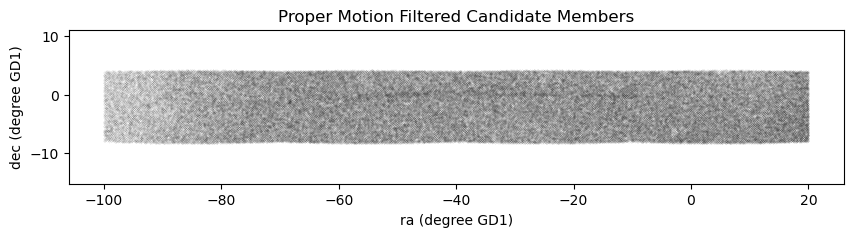

In [57]:
x = results_t['phi1']
y = results_t['phi2']

plt.figure(figsize=(10, 2))

plt.plot(x, y, 'ko', markersize=0.1, alpha=0.2)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)')

plt.axis('equal');

plt.title('Proper Motion Filtered Candidate Members')


Text(0.5, 1.0, 'Proper Motion + Photometry Filtered Candidate Members')

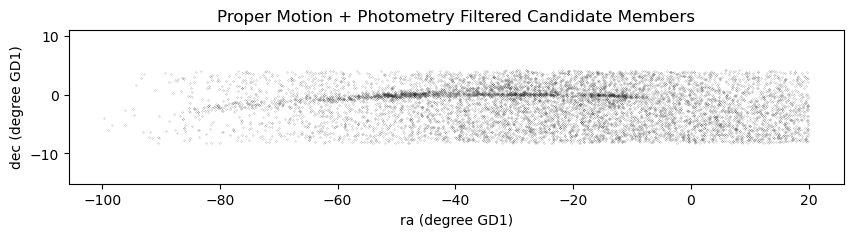

In [56]:
%config InlineBackend.figure_format = 'png' # Render plots as SVG

x = winner_t['phi1']
y = winner_t['phi2']

plt.figure(figsize=(10, 2))

plt.plot(x, y, 'ko', markersize=.1, alpha=1)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)')



plt.axis('equal');

plt.title('Proper Motion + Photometry Filtered Candidate Members')
